# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('youtube_kr.csv', index_col=0)
df.head(5)

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,tags_split,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-09 00:00:00,Sunday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday,...,"['보겸', 'bokyem']",2,5947503,61,53326,105756,139946,0,0,0
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12 00:00:00,Wednesday,2020-08-12 00:00:00,1900-01-01 09:00:08,Wednesday,...,"['총몇명', '재밌는 만화', '부락토스', '루시퍼', '총몇명 프리퀄', '총...",6,963384,228,28244,494,3339,0,0,1
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-10 00:00:00,Monday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday,...,"['양팡', '양팡유튜브', '팡튜브', '가족시트콤', '양팡가족', '양팡가족시...",27,2950885,0,17974,68898,50688,0,0,0
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-11 00:00:00,Tuesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday,...,"['꽈뚜룹', '한국여행기', 'quaddurup', '뚜룹이', 'korea', ...",12,1743374,81,36893,1798,8751,0,0,1
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-11 00:00:00,Tuesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,"['JYP Entertainment', 'JYP', 'J.Y.Park', 'JYPa...",13,3433885,257,353337,9763,23405,0,0,1


In [2]:
df=df.drop_duplicates(['video_id'], keep = 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10923 entries, 0 to 79375
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10923 non-null  object
 1   video_title        10923 non-null  object
 2   channel_id         10923 non-null  object
 3   channel_title      10923 non-null  object
 4   category           10923 non-null  int64 
 5   trending_date      10923 non-null  object
 6   trending_week      10923 non-null  object
 7   publishedAt_date   10923 non-null  object
 8   publishedAt_time   10923 non-null  object
 9   publishedAt_week   10923 non-null  object
 10  duration           10923 non-null  int64 
 11  tags_split         10923 non-null  object
 12  tags_len           10923 non-null  int64 
 13  view_count         10923 non-null  int64 
 14  play_time          10923 non-null  int64 
 15  likes              10923 non-null  int64 
 16  dislikes           10923 non-null  int64

In [3]:
df["video_len"]=0
df["channel_len"]=0

for i in range(len(df)):    
    df["video_len"].iloc[i]=len(df["video_title"].iloc[i])
    df["channel_len"].iloc[i]=len(df["channel_title"].iloc[i])

C:\Users\yhg31\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
df1=df[df["duration"]>5]
df2=df[df["duration"]<=5]
df1["pred"]=1
df2["pred"]=0
df=pd.concat([df1, df2])
df.reset_index(inplace=True, drop=True)
df

<ipython-input-4-aa5fb0efe563>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pred"]=1
<ipython-input-4-aa5fb0efe563>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pred"]=0


,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-09 00:00:00,Sunday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday,...,61,53326,105756,139946,0,0,0,11,5,1
1,9d7jNUjBoss,평생 반성하면서 살겠습니다.,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-10 00:00:00,Monday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday,...,0,17974,68898,50688,0,0,0,15,11,1
2,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-11 00:00:00,Tuesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday,...,81,36893,1798,8751,0,0,1,20,13,1
3,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-11 00:00:00,Tuesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,257,353337,9763,23405,0,0,1,48,17,1
4,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-11 00:00:00,Tuesday,2020-08-11 00:00:00,1900-01-01 15:00:13,Tuesday,...,20,714301,15176,31040,0,0,1,25,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,esQPl9_rA6U,전국민의 99%가 홍합으로 알고 먹는 이것의 정체,UCY2uWQDCzn_ZE-JpTfDRR2A,입질의추억TV jiminTV,24,2021-09-21 00:00:00,Tuesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday,...,803,4509,135,407,0,0,1,27,15,0
10919,WL4ipAjcspE,[웰메이드 X 임영웅] 21FW 시즌 화보 촬영 비하인드 영상 공개,UCgeeQuH16jS4UEOIxc-kwoQ,웰메이드,24,2021-09-21 00:00:00,Tuesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday,...,410,17438,57,1136,0,0,1,37,4,0
10920,yqLla5LbpH8,사랑인가? 증오인가? 애정과 비명이 난무하는 아리랑은고양이 채널 통역!,UC69l_rtlCQ7M4Mz2RCS80BA,미야옹철의 냥냥펀치,15,2021-09-21 00:00:00,Tuesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday,...,744,4399,34,280,0,0,1,39,10,0
10921,n028FLMfsSY,송편 안에 100만원이 들어가 있는 100만원짜리 대왕 송편 선물하기,UC1dK7oMUSR9Rnk1BSpOKZng,정선호,22,2021-09-21 00:00:00,Tuesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday,...,917,6545,168,561,0,0,1,38,3,0


In [5]:
df.iloc[:, 5:9]

,trending_date,trending_week,publishedAt_date,publishedAt_time
0,2020-08-09 00:00:00,Sunday,2020-08-09 00:00:00,1900-01-01 09:32:48
1,2020-08-10 00:00:00,Monday,2020-08-10 00:00:00,1900-01-01 09:54:13
2,2020-08-11 00:00:00,Tuesday,2020-08-11 00:00:00,1900-01-01 15:00:58
3,2020-08-11 00:00:00,Tuesday,2020-08-11 00:00:00,1900-01-01 09:00:13
4,2020-08-11 00:00:00,Tuesday,2020-08-11 00:00:00,1900-01-01 15:00:13
...,...,...,...,...
10918,2021-09-21 00:00:00,Tuesday,2021-09-21 00:00:00,1900-01-01 10:01:25
10919,2021-09-21 00:00:00,Tuesday,2021-09-21 00:00:00,1900-01-01 02:00:05
10920,2021-09-21 00:00:00,Tuesday,2021-09-21 00:00:00,1900-01-01 10:00:33
10921,2021-09-21 00:00:00,Tuesday,2021-09-21 00:00:00,1900-01-01 05:26:41


In [6]:
df["trending_week"]=df["trending_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["trending_date"]=df["trending_date"].str.split(' ').str[0]
df["publishedAt_date"]=df["publishedAt_date"].str.split(' ').str[0]
df["publishedAt_time"]=df["publishedAt_time"].str.split(' ').str[1]

In [7]:
df["trending_week"].value_counts()

4    1792
3    1720
2    1635
1    1523
0    1476
5    1459
6    1318
Name: trending_week, dtype: int64

In [8]:
df.iloc[:, 5:9]

,trending_date,trending_week,publishedAt_date,publishedAt_time
0,2020-08-09,6,2020-08-09,09:32:48
1,2020-08-10,0,2020-08-10,09:54:13
2,2020-08-11,1,2020-08-11,15:00:58
3,2020-08-11,1,2020-08-11,09:00:13
4,2020-08-11,1,2020-08-11,15:00:13
...,...,...,...,...
10918,2021-09-21,1,2021-09-21,10:01:25
10919,2021-09-21,1,2021-09-21,02:00:05
10920,2021-09-21,1,2021-09-21,10:00:33
10921,2021-09-21,1,2021-09-21,05:26:41


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10923 non-null  object
 1   video_title        10923 non-null  object
 2   channel_id         10923 non-null  object
 3   channel_title      10923 non-null  object
 4   category           10923 non-null  int64 
 5   trending_date      10923 non-null  object
 6   trending_week      10923 non-null  int64 
 7   publishedAt_date   10923 non-null  object
 8   publishedAt_time   10923 non-null  object
 9   publishedAt_week   10923 non-null  object
 10  duration           10923 non-null  int64 
 11  tags_split         10923 non-null  object
 12  tags_len           10923 non-null  int64 
 13  view_count         10923 non-null  int64 
 14  play_time          10923 non-null  int64 
 15  likes              10923 non-null  int64 
 16  dislikes           10923 non-null  int64

In [9]:
df=df.sort_values(by=['trending_date'], axis=0)
df.reset_index(inplace=True, drop=True)
df.head()

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,n5StUwJPF_g,[순간포착 세상에 이런 일이 레전드] ‘검은 얼굴의 남자’ 풀버전 다시보기ㅣ순간포착...,UCYZv9v_bwfMGc64gLRe34OA,SBS STORY,15,2020-08-05,2,2020-08-05,02:00:03,Wednesday,...,1319,15804,986,3748,0,0,1,83,9,0
1,xPxrAHrQcmM,삼성의 첫 노캔 무선 이어폰? 갤럭시 버즈 라이브&워치3 모든 색상 동시 언빡싱과 ...,UCdUcjkyZtf-1WJyPPiETF1g,ITSub잇섭,28,2020-08-05,2,2020-08-05,15:45:01,Wednesday,...,858,14013,465,4814,0,0,1,51,7,0
2,fKOJjBlXlX8,자기를 살려준 인간을 기억한 돌고래가 보여준 믿을 수 없는 실화,UCMguxwveCsLVpyKrLz-EFTg,달빛뮤즈,1,2020-08-05,2,2020-08-05,10:45:12,Wednesday,...,0,11004,303,257,0,0,1,35,4,0
3,Hjy-LuGGxh0,"강형욱, 개훌륭 최초로 올가미 사용하다! 역대급 경계심 천둥이[개는 룰륭하다]",UCAhKKbDO9-ymWZ_7iAFLBQQ,KBS동물티비 : 애니멀포유 animal4u,15,2020-08-05,2,2020-08-05,23:00:03,Wednesday,...,1181,4824,296,2000,0,0,1,43,24,0
4,HQjtBOdG_fQ,너희 형제 맞아?? 갤럭시 노트20 & 노트20 울트라 개봉기 [4K],UC_0oo0GPlDUU88ubLDnJkSQ,UNDERkg,28,2020-08-05,2,2020-08-05,23:00:02,Wednesday,...,861,5003,289,2373,0,0,1,39,7,0


<AxesSubplot:>

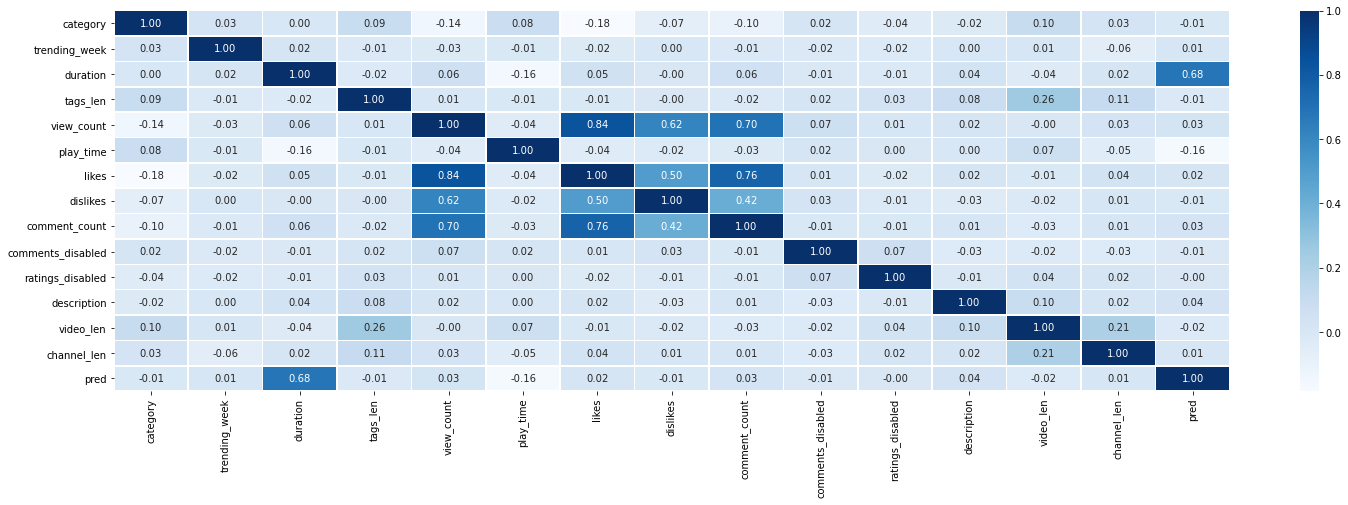

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = df.corr()
plt.figure(figsize = (25, 7))
sns.heatmap(data = corr, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

<AxesSubplot:>

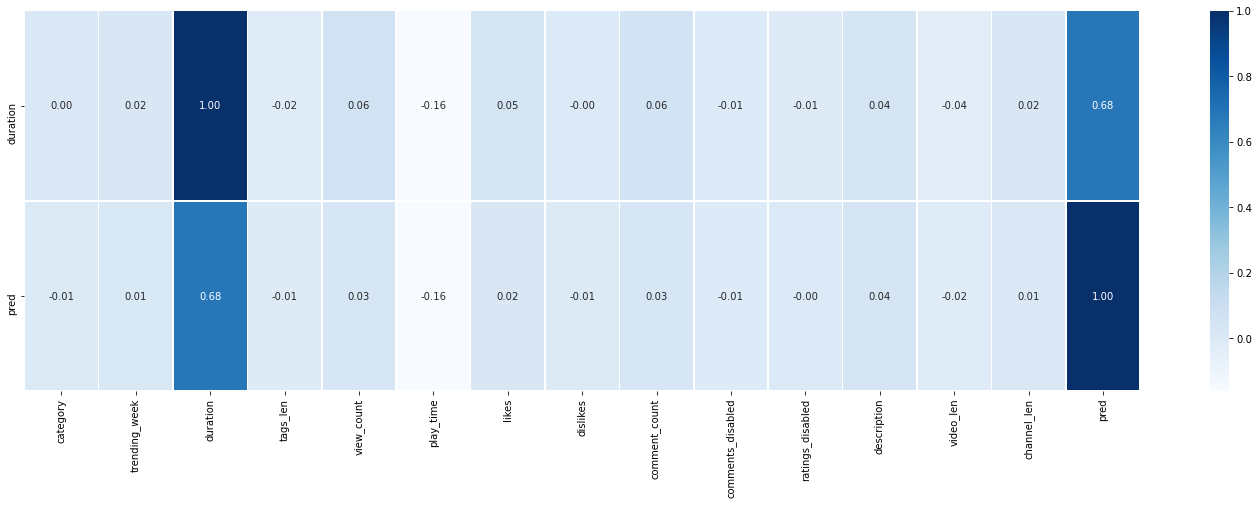

In [11]:
high = corr[(corr["pred"]>0.3) | (corr["pred"]< -0.3)]
plt.figure(figsize = (25, 7))
sns.heatmap(data = high, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

# train / test 분리

In [10]:
X=df[["category", "trending_week", "tags_len", "view_count", "play_time", "likes", "dislikes",
      "comment_count", "comments_disabled", "ratings_disabled", "description", "video_len", "channel_len"]]
Y=df["pred"]

In [11]:
# 전체 선택
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (7646, 13)
x_test shape: (3277, 13)
y_train shape: (7646,)
y_test shape: (3277,)


In [12]:
print('y_train 상태')
print(y_train.value_counts())
print('y_test  상태')
print(y_test.value_counts())

y_train 상태
1    5697
0    1949
Name: pred, dtype: int64
y_test  상태
1    2402
0     875
Name: pred, dtype: int64


In [17]:
#스케일
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# SVM
- 어느 한쪽에 치우쳐지지 않고 양쪽에 균등할 경우 사용
- 과적합 적음

## 전체 사용

In [14]:
from sklearn import svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
svm_train_pred = svm.predict(x_train)
svm_test_pred = svm.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
print("svm 전체 train 정확도 : {0:.3f}".format(accuracy_score(y_train, svm_train_pred)))
print("svm 전체 test  정확도 : {0:.3f}".format(accuracy_score(y_test, svm_test_pred)))

svm 전체 train 정확도 : 0.745
svm 전체 test  정확도 : 0.733


In [16]:
from sklearn.metrics import confusion_matrix

print("SVM 전체 train\n", confusion_matrix(y_train, svm_train_pred))
print()
print("SVM 전체 test\n", confusion_matrix(y_test, svm_test_pred))

SVM 전체 train
 [[   3 1946]
 [   0 5697]]

SVM 전체 test
 [[   0  875]
 [   0 2402]]


In [18]:
from sklearn.svm import LinearSVC

l_svm = LinearSVC()
l_svm.fit(x_train, y_train)
l_svm_train_pred = l_svm.predict(x_train)
l_svm_test_pred = l_svm.predict(x_test)

C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [19]:
print("LinearSVC 전체 train 정확도 : {0:.3f}".format(accuracy_score(y_train, l_svm_train_pred)))
print("LinearSVC 전체 test  정확도 : {0:.3f}".format(accuracy_score(y_test, l_svm_test_pred)))

LinearSVC 전체 train 정확도 : 0.262
LinearSVC 전체 test  정확도 : 0.252


In [20]:
print("LinearSVC 전체 train\n", confusion_matrix(y_train, l_svm_train_pred))
print()
print("LinearSVC 전체 test\n", confusion_matrix(y_test, l_svm_test_pred))

LinearSVC 전체 train
 [[2000    0]
 [5644    2]]

LinearSVC 전체 test
 [[ 824    0]
 [2451    2]]


## 스케일된 피처

In [21]:
from sklearn import svm
from sklearn.svm import SVC

sc_svm = svm.SVC()
sc_svm.fit(x_train_scaled, y_train)
sc_svm_train_pred = sc_svm.predict(x_train_scaled)
sc_svm_test_pred = sc_svm.predict(x_test_scaled)

In [22]:
print("svm 스케일 train 정확도 : {0:.3f}".format(accuracy_score(y_train, sc_svm_train_pred)))
print("svm 스케일 test  정확도 : {0:.3f}".format(accuracy_score(y_test, sc_svm_test_pred)))

svm 스케일 train 정확도 : 0.999
svm 스케일 test  정확도 : 0.994


In [23]:
print("SVM 스케일 train\n", confusion_matrix(y_train, sc_svm_train_pred))
print()
print("SVM 스케일 test\n", confusion_matrix(y_test, sc_svm_test_pred))

SVM 스케일 train
 [[1990   10]
 [   1 5645]]

SVM 스케일 test
 [[ 809   15]
 [   4 2449]]


In [24]:
sc_l_svm = SVC(kernel='linear')
sc_l_svm.fit(x_train_scaled, y_train)
sc_l_svm_train_pred = sc_l_svm.predict(x_train_scaled)
sc_l_svm_test_pred = sc_l_svm.predict(x_test_scaled)

In [25]:
print("LinearSVC 스케일 train 정확도 : {0:.3f}".format(accuracy_score(y_train, sc_l_svm_train_pred)))
print("LinearSVC 스케일 test  정확도 : {0:.3f}".format(accuracy_score(y_test, sc_l_svm_test_pred)))

LinearSVC 스케일 train 정확도 : 1.000
LinearSVC 스케일 test  정확도 : 1.000


In [26]:
print("LinearSVC 스케일 train\n", confusion_matrix(y_train, sc_l_svm_train_pred))
print()
print("LinearSVC 스케일 test\n", confusion_matrix(y_test, sc_l_svm_test_pred))

LinearSVC 스케일 train
 [[2000    0]
 [   0 5646]]

LinearSVC 스케일 test
 [[ 824    0]
 [   0 2453]]


# LDA
- 2개이상 범주때 사용, 이 범주가 명확할수록 좋음

## 전체 사용

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_train_pred = lda.predict(x_train)
lda_test_pred = lda.predict(x_test)

In [28]:
print("LDA 전체 train 정확도 : {0:.3f}".format(accuracy_score(y_train, lda_train_pred)))
print("LDA 전체 test  정확도 : {0:.3f}".format(accuracy_score(y_test, lda_test_pred)))

LDA 전체 train 정확도 : 0.934
LDA 전체 test  정확도 : 0.934


In [29]:
print("LDA 전체 train\n", confusion_matrix(y_train, lda_train_pred))
print()
print("LDA 전체 test\n", confusion_matrix(y_test, lda_test_pred))

LDA 전체 train
 [[1498  502]
 [   4 5642]]

LDA 전체 test
 [[ 608  216]
 [   1 2452]]


## 스케일된 피처

In [78]:
sc_lda = LinearDiscriminantAnalysis()
sc_lda.fit(x_train_scaled, y_train)
sc_lda_train_pred = sc_lda.predict(x_train_scaled)
sc_lda_test_pred = sc_lda.predict(x_test_scaled)

In [79]:
print("LDA 스케일 train 정확도 : {0:.3f}".format(accuracy_score(y_train, sc_lda_train_pred)))
print("LDA 스케일 test  정확도 : {0:.3f}".format(accuracy_score(y_test, sc_lda_test_pred)))

LDA 스케일 train 정확도 : 0.934
LDA 스케일 test  정확도 : 0.934


In [97]:
print("LDA 스케일 train\n", confusion_matrix(y_train, sc_lda_train_pred))
print()
print("LDA 스케일 test\n", confusion_matrix(y_test, sc_lda_test_pred))

LDA 스케일 train
 [[1498  502]
 [   4 5642]]

LDA 스케일 test
 [[ 608  216]
 [   1 2452]]


# Keras
- 시계열 데이터에 사용하는 모델

## 전체 사용

In [33]:
x_train_t = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_t = x_test.values.reshape(x_test.shape[0], x_train.shape[1], 1)

In [34]:
y_train_t = y_train.values.reshape(y_train.shape[0], 1)
y_test_t = y_test.values.reshape(y_test.shape[0], 1)

In [35]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation

K.clear_session() #메모리 문제

lstm = Sequential()
lstm.add(Dense(1, activation='relu', input_dim=14))
lstm.add(Dense(1, activation='softmax'))
lstm.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [36]:
lstm.fit(x_train, y_train_t, epochs=20, batch_size=32)

Epoch 1/20
239/239 [==============================] - 13s 930us/step - loss: 0.6792 - accuracy: 0.7428
Epoch 2/20
239/239 [==============================] - 0s 925us/step - loss: 0.6360 - accuracy: 0.7381
Epoch 3/20
239/239 [==============================] - 0s 928us/step - loss: 0.6076 - accuracy: 0.7361
Epoch 4/20
239/239 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.7400: 0s - loss: 0.5874 - accuracy
Epoch 5/20
239/239 [==============================] - 0s 923us/step - loss: 0.5843 - accuracy: 0.7330
Epoch 6/20
239/239 [==============================] - 0s 878us/step - loss: 0.5826 - accuracy: 0.7315
Epoch 7/20
239/239 [==============================] - 0s 899us/step - loss: 0.5736 - accuracy: 0.7401
Epoch 8/20
239/239 [==============================] - 0s 955us/step - loss: 0.5767 - accuracy: 0.73660s - loss: 0.5807 - accuracy: 
Epoch 9/20
239/239 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7352
Epoch 10/20
239/239 [====

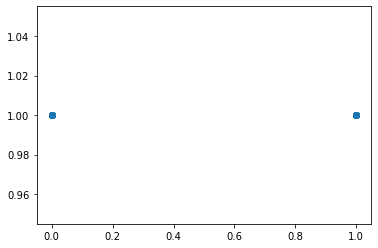

In [37]:
lstm_train_pred = lstm.predict(x_train, batch_size=32)
plt.scatter(y_train, lstm_train_pred)

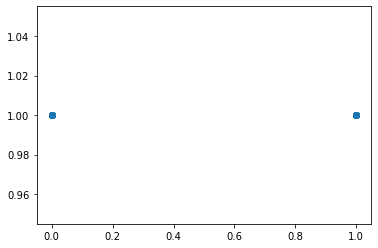

In [38]:
lstm_test_pred = lstm.predict(x_test, batch_size=32)
plt.scatter(y_test, lstm_test_pred)

In [39]:
print("LSTM 전체 train 정확도 : {0:.3f}".format(lstm.evaluate(x_train, y_train_t, batch_size=32)[1]))
print("LSTM 전체 test  정확도 : {0:.3f}".format(lstm.evaluate(x_test, y_test_t, batch_size=32)[1]))

239/239 [==============================] - 1s 703us/step - loss: 0.5747 - accuracy: 0.7384
LSTM 전체 train 정확도 : 0.738
103/103 [==============================] - 0s 778us/step - loss: 0.5871 - accuracy: 0.7486
LSTM 전체 test  정확도 : 0.749


In [40]:
LSTM_train_pred = np.round(lstm_train_pred)
LSTM_test_pred = np.round(lstm_test_pred)

print("LSTM 전체 train\n", confusion_matrix(y_train, LSTM_train_pred))
print()
print("LSTM 전체 test\n", confusion_matrix(y_test, LSTM_test_pred))

LSTM 전체 train
 [[   0 2000]
 [   0 5646]]

LSTM 전체 test
 [[   0  824]
 [   0 2453]]


## 스케일된 피처

In [81]:
K.clear_session() #메모리 문제

sc_lstm = Sequential()
sc_lstm.add(Dense(1, activation='relu', input_dim=14))
sc_lstm.add(Dense(1, activation='softmax'))
sc_lstm.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

sc_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [82]:
sc_lstm.fit(x_train_scaled, y_train_t, epochs=20, batch_size=32)

Epoch 1/20
239/239 [==============================] - 1s 795us/step - loss: 0.7766 - accuracy: 0.7324
Epoch 2/20
239/239 [==============================] - 0s 842us/step - loss: 0.6361 - accuracy: 0.7326
Epoch 3/20
239/239 [==============================] - 0s 869us/step - loss: 0.6005 - accuracy: 0.7399
Epoch 4/20
239/239 [==============================] - 0s 823us/step - loss: 0.5755 - accuracy: 0.7397
Epoch 5/20
239/239 [==============================] - 0s 819us/step - loss: 0.5499 - accuracy: 0.7452
Epoch 6/20
239/239 [==============================] - 0s 818us/step - loss: 0.5283 - accuracy: 0.7450
Epoch 7/20
239/239 [==============================] - 0s 776us/step - loss: 0.5164 - accuracy: 0.73550s - loss: 0.5197 - accuracy: 0.
Epoch 8/20
239/239 [==============================] - 0s 805us/step - loss: 0.4959 - accuracy: 0.7368
Epoch 9/20
239/239 [==============================] - 0s 814us/step - loss: 0.4797 - accuracy: 0.7264
Epoch 10/20
239/239 [=============================

In [83]:
print("LSTM 스케일 train 정확도 : {0:.3f}".format(sc_lstm.evaluate(x_train_scaled, y_train_t, batch_size=32)[1]))
print("LSTM 스케일 test  정확도 : {0:.3f}".format(sc_lstm.evaluate(x_test_scaled, y_test_t, batch_size=32)[1]))

239/239 [==============================] - 0s 661us/step - loss: 0.2433 - accuracy: 0.7384
LSTM 스케일 train 정확도 : 0.738
103/103 [==============================] - 0s 755us/step - loss: 0.2401 - accuracy: 0.7486
LSTM 스케일 test  정확도 : 0.749


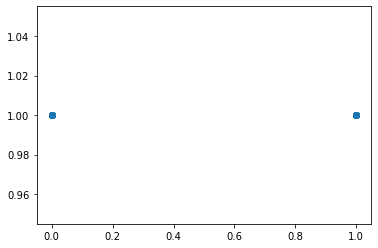

In [84]:
sc_lstm_train_pred = sc_lstm.predict(x_train_scaled, batch_size=30)
plt.scatter(y_train, sc_lstm_train_pred)

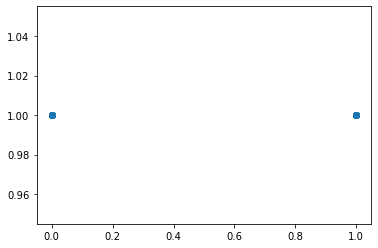

In [85]:
sc_lstm_test_pred = sc_lstm.predict(x_test_scaled, batch_size=30)
plt.scatter(y_test, sc_lstm_test_pred)

In [86]:
sc_LSTM_train_pred = np.round(sc_lstm_train_pred)
sc_LSTM_test_pred = np.round(sc_lstm_test_pred)

print("LSTM 스케일 train\n", confusion_matrix(y_train, sc_LSTM_train_pred))
print()
print("LSTM 스케일 test\n", confusion_matrix(y_test, sc_LSTM_test_pred))

LSTM 스케일 train
 [[   0 2000]
 [   0 5646]]

LSTM 스케일 test
 [[   0  824]
 [   0 2453]]


# GRU


## 전체 사용

In [47]:
import tensorflow as tf 
y_train_tt = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_tt = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [48]:
K.clear_session() #메모리 문제

gru = Sequential()
gru.add(Dense(32, activation='relu', input_dim=14))
gru.add(Dense(1, activation='sigmoid'))
gru.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'] )#binary_crossentropy 이항분류때 사용
gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [49]:
gru.fit(x_train, y_train, epochs=10, verbose=0)

In [50]:
from tensorflow.python.keras.callbacks import EarlyStopping
gru_early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
his=gru.fit(x_train, y_train, epochs=20,callbacks=[gru_early_stop])

Epoch 1/20
239/239 [==============================] - 0s 836us/step - loss: 466.0026 - accuracy: 0.6537
Epoch 2/20
239/239 [==============================] - 0s 840us/step - loss: 515.3065 - accuracy: 0.6358
Epoch 3/20
239/239 [==============================] - 0s 859us/step - loss: 475.7531 - accuracy: 0.6344
Epoch 4/20
239/239 [==============================] - 0s 827us/step - loss: 476.7592 - accuracy: 0.64100s - loss: 444.4012 - accuracy: 0.65
Epoch 5/20
239/239 [==============================] - 0s 830us/step - loss: 558.3505 - accuracy: 0.6431
Epoch 6/20
239/239 [==============================] - 0s 870us/step - loss: 577.3116 - accuracy: 0.6435
Epoch 7/20
239/239 [==============================] - 0s 870us/step - loss: 532.9867 - accuracy: 0.6347
Epoch 8/20
239/239 [==============================] - 0s 1ms/step - loss: 570.5377 - accuracy: 0.6288
Epoch 9/20
239/239 [==============================] - 0s 993us/step - loss: 561.7791 - accuracy: 0.6479
Epoch 10/20
239/239 [=========

In [51]:
print("GRU 전체 train MSE : {0:.3f}".format(gru.evaluate(x_train, y_train, batch_size=30)[1]))
print("GRU 전체 test  MSE : {0:.3f}".format(gru.evaluate(x_test, y_test, batch_size=30)[1]))

255/255 [==============================] - 0s 809us/step - loss: 211.2544 - accuracy: 0.7592
GRU 전체 train MSE : 0.759
110/110 [==============================] - 0s 701us/step - loss: 190.6934 - accuracy: 0.7678
GRU 전체 test  MSE : 0.768


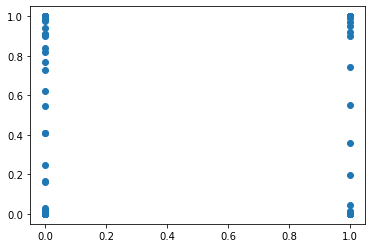

In [52]:
#train 예측 시각화
gru_train_pred = gru.predict(x_train, batch_size=30)
plt.scatter(y_train, gru_train_pred)

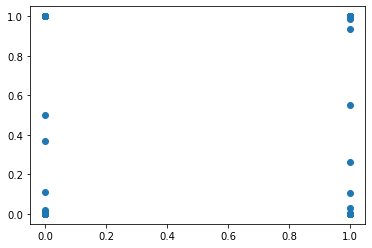

In [53]:
gru_test_pred = gru.predict(x_test, batch_size=30)
plt.scatter(y_test, gru_test_pred)

In [54]:
GRU_train_pred = np.round(gru_train_pred)
GRU_test_pred = np.round(gru_test_pred)

print("GRU 스케일 train\n", confusion_matrix(y_train, GRU_train_pred))
print()
print("GRU 스케일 test\n", confusion_matrix(y_test, GRU_test_pred))

GRU 스케일 train
 [[ 200 1800]
 [  41 5605]]

GRU 스케일 test
 [[  93  731]
 [  30 2423]]


## 스케일된 피처

In [55]:
from keras.layers import GRU
sc_gru = Sequential()
sc_gru.add(GRU(50, input_shape=(x_train_scaled.shape[1], 1)))
sc_gru.add(Dense(1))
sc_gru.compile(loss='mean_squared_error', optimizer='adam') 
sc_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                7950      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [56]:
sc_gru_early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
sc_gru.fit(x_train_t, y_train, epochs=30, batch_size=1024, verbose=1, callbacks=[sc_gru_early_stop])

Epoch 1/30
8/8 [==============================] - 6s 77ms/step - loss: 0.2076
Epoch 2/30
8/8 [==============================] - 1s 62ms/step - loss: 0.1933
Epoch 3/30
8/8 [==============================] - 0s 61ms/step - loss: 0.1861
Epoch 4/30
8/8 [==============================] - 1s 62ms/step - loss: 0.1792
Epoch 5/30
8/8 [==============================] - 0s 59ms/step - loss: 0.1716
Epoch 6/30
8/8 [==============================] - 1s 67ms/step - loss: 0.1593
Epoch 7/30
8/8 [==============================] - 1s 74ms/step - loss: 0.1444
Epoch 8/30
8/8 [==============================] - 1s 71ms/step - loss: 0.1252
Epoch 9/30
8/8 [==============================] - 1s 63ms/step - loss: 0.1119
Epoch 10/30
8/8 [==============================] - 1s 62ms/step - loss: 0.0944
Epoch 11/30
8/8 [==============================] - 1s 69ms/step - loss: 0.0833
Epoch 12/30
8/8 [==============================] - 1s 66ms/step - loss: 0.0704
Epoch 13/30
8/8 [==============================] - 1s 68ms/st

In [57]:
print("GRU 스케일 train MSE : {0:.3f}".format(gru.evaluate(x_train_t, y_train, batch_size=30)))
print("GRU 스케일 test  MSE : {0:.3f}".format(gru.evaluate(x_test_t, y_test, batch_size=30)))

ValueError: in user code:

    C:\Users\yhg31\Anaconda3\lib\site-packages\keras\engine\training.py:1298 test_function  *
        return step_function(self, iterator)
    C:\Users\yhg31\Anaconda3\lib\site-packages\keras\engine\training.py:1282 run_step  *
        outputs = model.test_step(data)
    C:\Users\yhg31\Anaconda3\lib\site-packages\keras\engine\training.py:1241 test_step  *
        y_pred = self(x, training=False)
    C:\Users\yhg31\Anaconda3\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\yhg31\Anaconda3\lib\site-packages\keras\engine\input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 14 but received input with shape (None, 14, 1)


In [58]:
sc_gru_train_pred = sc_gru.predict(x_train_T, batch_size=30)
plt.scatter(y_train, sc_gru_train_pred)

NameError: name 'x_train_T' is not defined

In [59]:
sc_gru_test_pred = sc_gru.predict(x_test_T, batch_size=30)
plt.scatter(y_test, sc_gru_test_pred)

NameError: name 'x_test_T' is not defined

In [60]:
sc_GRU_train_pred = np.round(sc_gru_train_pred)
sc_GRU_test_pred = np.round(sc_gru_test_pred)

print("GRU 스케일 train\n", confusion_matrix(y_train, sc_GRU_train_pred))
print()
print("GRU 스케일 test\n", confusion_matrix(y_test, sc_GRU_test_pred))

NameError: name 'sc_gru_train_pred' is not defined

# mlp

## 전체 사용

In [61]:
from keras.layers import Dropout

mlp = Sequential()
mlp.add(Dense(64, input_dim=14, activation='relu'))
mlp.add(Dropout(0.5))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dropout(0.5))
mlp.add(Dense(1, activation='sigmoid'))

mlp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [62]:
mlp.fit(x_train, y_train_t, epochs=20, batch_size=128)

Epoch 1/20
60/60 [==============================] - 1s 2ms/step - loss: 36814.9404 - accuracy: 0.6312
Epoch 2/20
60/60 [==============================] - 0s 2ms/step - loss: 27059.9422 - accuracy: 0.6091
Epoch 3/20
60/60 [==============================] - 0s 2ms/step - loss: 14852.7989 - accuracy: 0.6167
Epoch 4/20
60/60 [==============================] - 0s 2ms/step - loss: 11267.9623 - accuracy: 0.6188: 0s - loss: 12069.9716 - accuracy: 0.
Epoch 5/20
60/60 [==============================] - 0s 2ms/step - loss: 7131.9328 - accuracy: 0.6507
Epoch 6/20
60/60 [==============================] - 0s 2ms/step - loss: 4739.7045 - accuracy: 0.6355
Epoch 7/20
60/60 [==============================] - 0s 2ms/step - loss: 4088.6463 - accuracy: 0.6207
Epoch 8/20
60/60 [==============================] - 0s 2ms/step - loss: 3058.9467 - accuracy: 0.6095
Epoch 9/20
60/60 [==============================] - 0s 2ms/step - loss: 1854.0948 - accuracy: 0.6317
Epoch 10/20
60/60 [==============================

In [63]:
print("MLP 전체 train MSE : {0:.3f}".format(mlp.evaluate(x_train, y_train, batch_size=30)[1]))
print("MLP 전체 test  MSE : {0:.3f}".format(mlp.evaluate(x_test, y_test, batch_size=30)[1]))

255/255 [==============================] - 1s 778us/step - loss: 6.0621 - accuracy: 0.7435
MLP 전체 train MSE : 0.744
110/110 [==============================] - 0s 905us/step - loss: 5.3505 - accuracy: 0.7516
MLP 전체 test  MSE : 0.752


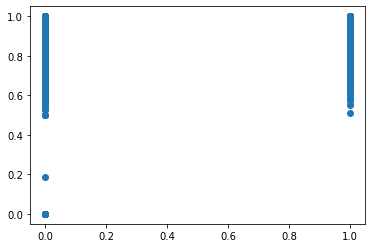

In [64]:
mlp_train_pred = mlp.predict(x_train, batch_size=30)
plt.scatter(y_train, mlp_train_pred)

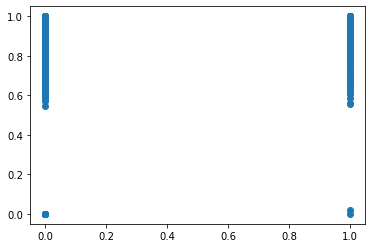

In [65]:
mlp_test_pred = mlp.predict(x_test, batch_size=30)
plt.scatter(y_test, mlp_test_pred)

In [66]:
MLP_train_pred = np.round(mlp_train_pred)
MLP_test_pred = np.round(mlp_test_pred)
print("MLP 전체 train\n", confusion_matrix(y_train, MLP_train_pred))
print()
print("MLP 전체 test\n", confusion_matrix(y_test, MLP_test_pred))

MLP 전체 train
 [[  39 1961]
 [   0 5646]]

MLP 전체 test
 [[  12  812]
 [   2 2451]]


## 스케일된 피처

In [67]:
sc_mlp = Sequential()
sc_mlp.add(Dense(64, input_dim=14, activation='relu'))
sc_mlp.add(Dropout(0.5))
sc_mlp.add(Dense(64, activation='relu'))
sc_mlp.add(Dropout(0.5))
sc_mlp.add(Dense(1, activation='sigmoid'))

sc_mlp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [68]:
sc_mlp.fit(x_train_scaled, y_train_t, epochs=20, batch_size=128)

Epoch 1/20
60/60 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.7282
Epoch 2/20
60/60 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8576
Epoch 3/20
60/60 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9140
Epoch 4/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9324
Epoch 5/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9446
Epoch 6/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9574
Epoch 7/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9656
Epoch 8/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.9757
Epoch 9/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9782
Epoch 10/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9864
Epoch 11/20
60/60 [

In [69]:
print("MLP 스케일 train MSE : {0:.3f}".format(mlp.evaluate(x_train_scaled, y_train, batch_size=30)[1]))
print("MLP 스케일 test  MSE : {0:.3f}".format(mlp.evaluate(x_test_scaled, y_test, batch_size=30)[1]))

255/255 [==============================] - 1s 1ms/step - loss: 0.8192 - accuracy: 0.2616: 0s - loss: 0.8194 - accuracy: 0.26
MLP 스케일 train MSE : 0.262
110/110 [==============================] - 0s 1ms/step - loss: 0.8240 - accuracy: 0.2514
MLP 스케일 test  MSE : 0.251


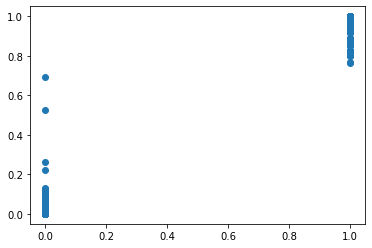

In [70]:
sc_mlp_train_pred = sc_mlp.predict(x_train_scaled, batch_size=30)
plt.scatter(y_train, sc_mlp_train_pred)

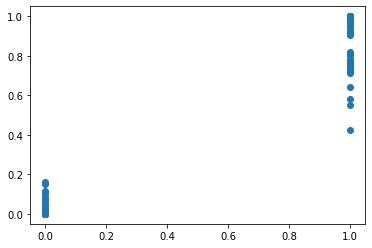

In [71]:
sc_mlp_test_pred = sc_mlp.predict(x_test_scaled, batch_size=30)
plt.scatter(y_test, sc_mlp_test_pred)

In [98]:
sc_MLP_train_pred = np.round(sc_mlp_train_pred)
sc_MLP_test_pred = np.round(sc_mlp_test_pred)
print("MLP 스케일 train\n", confusion_matrix(y_train, sc_MLP_train_pred))
print()
print("MLP 스케일 test\n", confusion_matrix(y_test, sc_MLP_test_pred))

MLP 스케일 train
 [[1998    2]
 [   0 5646]]

MLP 스케일 test
 [[ 824    0]
 [   1 2452]]
